# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


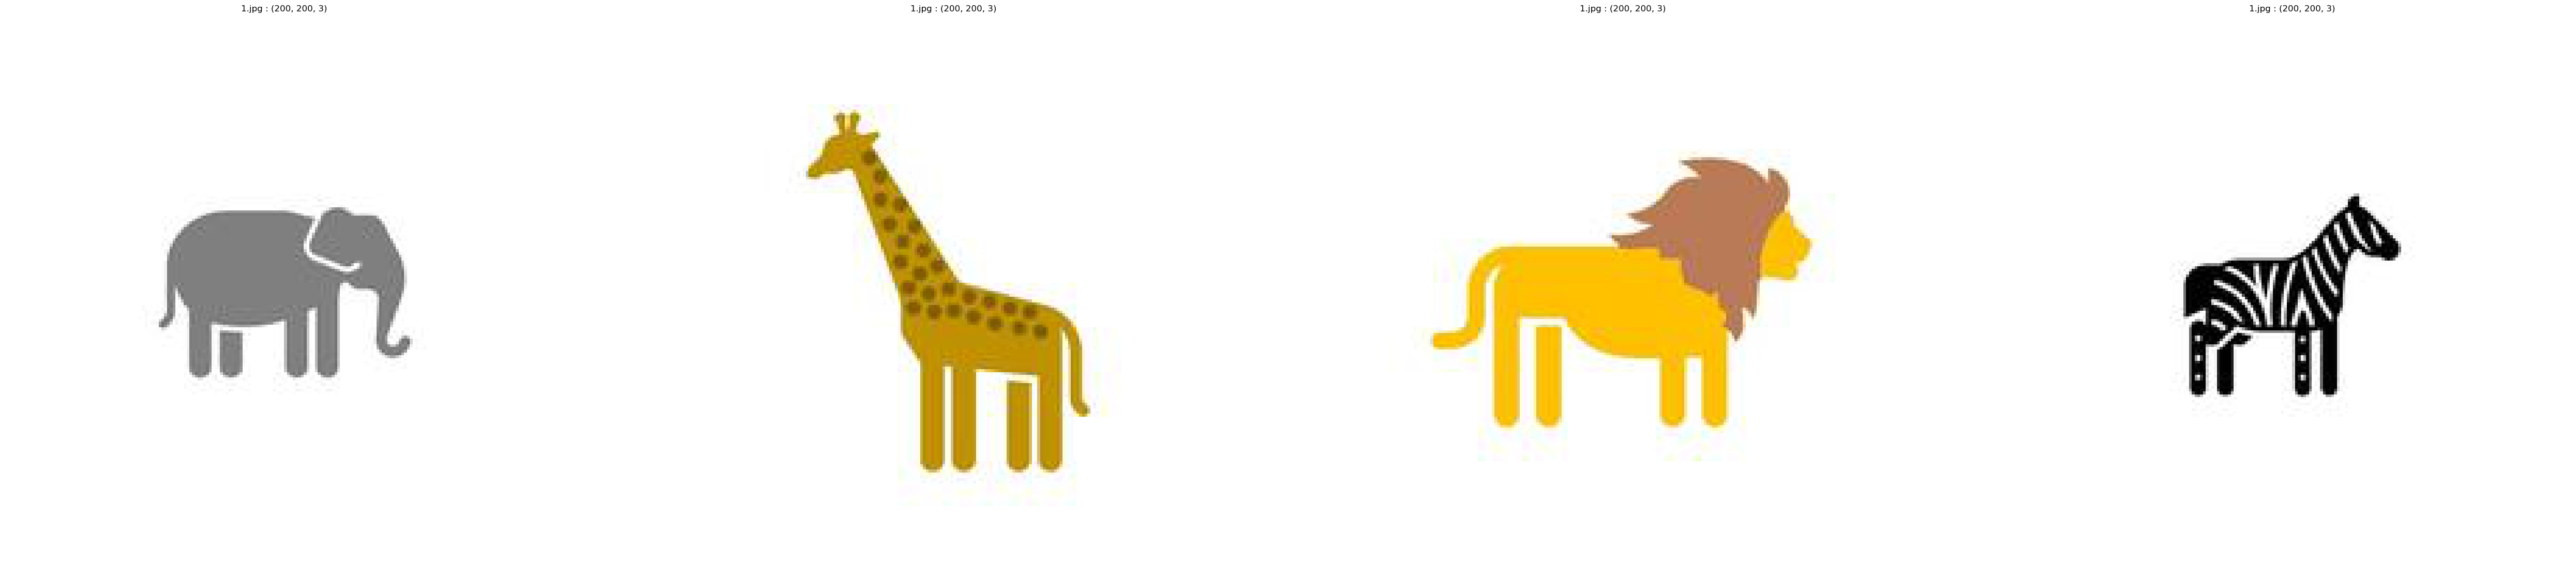

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# You need to change the data_path to match the location of your images
data_path = "/Users/henko/Downloads/Project/safari/safari/training"
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(64, 64))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [2]:
#Your libraries here
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [3]:
# Define the model as a sequence of layers
model = Sequential()
# Input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6),padding='same', activation='relu', input_shape=(32, 32, 3)))
# Add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(64, (6, 6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(128, (6, 6),padding ='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.5))
# Flatten the feature maps 
model.add(Flatten())
# Generate an output layer with a predicted probability for each class
model.add(Dense(10, activation='softmax')) #Should be 4 output classes not 10 
# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Learning Rate ? 
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Train the model
Train a CNN model with 10 epochs.

In [4]:
# Your Code to train a CNN model...
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

#Normalize pixel values between 0 and 1 
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255 

# Convert class vectors to binary class matrices(one hot encoding)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#Train Model 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 125s 79ms/step - loss: 1.5131 - accuracy: 0.4500 - val_loss: 1.2053 - val_accuracy: 0.5666
Epoch 2/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.1471 - accuracy: 0.5915 - val_loss: 1.0940 - val_accuracy: 0.6168
Epoch 3/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.9985 - accuracy: 0.6486 - val_loss: 1.0328 - val_accuracy: 0.6403
Epoch 4/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.9036 - accuracy: 0.6823 - val_loss: 0.9260 - val_accuracy: 0.6750
Epoch 5/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.8350 - accuracy: 0.7068 - val_loss: 0.9161 - val_accuracy: 0.6819
Epoch 6/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.7776 - accuracy: 0.7285 - val_loss: 0.8377 - val_accuracy: 0.7098
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7295 - accuracy: 0.7444 - val_loss: 0

### View loss history
- To check for overfitting.

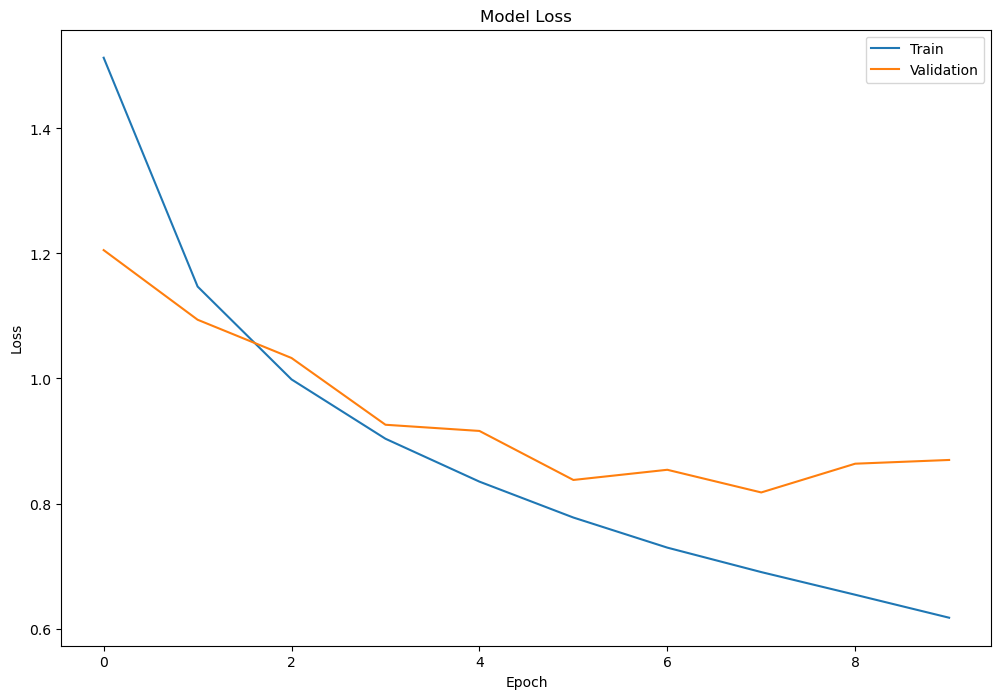

In [5]:
# your code here
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

### Evaluate the model

In [ ]:
# Get the image and label arrays for the first batch of validation data

# Use the model to predict the class

# The model returns a probability value for each class
# The one with the highest probability is the predicted class

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1

# Plot the confusion matrix


### Save your model

Add code below to save your model's trained weights.

In [ ]:
# Code to save your model

### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

In [ ]:
# Your code here

Hopefully, your model predicted all four of the image classes correctly!